In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn import preprocessing


In [2]:
df1=pd.read_csv('ai4i2020.csv',index_col='UDI')

In [3]:
df1.head(5)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Source of Data:
https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset


If we consider the Machine failure and its failure modes one at a time. we have a binary response variable.  this is a good place to use logistic regression for classification.

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
#lets check for missing data
df1.isnull().values.any()

False

In [6]:
df1.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [7]:
x=type(df1[list(df1)[0]].unique())

In [8]:
len(list(df1[list(df1)[0]].unique()))

10000

the product ID 's are unique, along with the UDI, only 1 is needed to 
Also, Process temp is a function of Air temperature. Fwatures need to be independent, so the Process temp will get dropped as well.

In [9]:
df1.drop('Process temperature [K]', axis=1, inplace= True)
df1.drop('Rotational speed [rpm]', axis=1, inplace= True)
df1.drop('Product ID', axis=1, inplace= True)

In [10]:
df1.head()

,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,
1,M,298.1,42.8,0,0,0,0,0,0,0
2,L,298.2,46.3,3,0,0,0,0,0,0
3,L,298.1,49.4,5,0,0,0,0,0,0
4,L,298.2,39.5,7,0,0,0,0,0,0
5,L,298.2,40.0,9,0,0,0,0,0,0


We need to convert categorical object data to categorical numerical data.
Ill  write a quick function

In [11]:
def convert_to_num(data_frame):
    """returns a dictinary for evenly 
    weighted categorial to numerical conversion"""
    
    dict1={}
    for col in df1[list(df1)]: #for columns in data frame that have text, convert to numerical 
        if df1.dtypes[col]=='object':
            how_long=len(df1[col].unique())
            for count,value in enumerate(df1[col].unique()):
                dict1[value]=count
    return dict1
            
    

In [12]:
df1.dtypes['Type']

dtype('O')

In [13]:
df1['Type'].unique()[0]

'M'

A dictionary to track categorical conversions

In [14]:
print(convert_to_num(df1))

{'M': 0, 'L': 1, 'H': 2}


In [15]:
df2=df1.replace(convert_to_num(df1))

In [16]:
pd.set_option('display.max_rows',df2.shape[0]+1)
df2.head(5)

,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,
1,0,298.1,42.8,0,0,0,0,0,0,0
2,1,298.2,46.3,3,0,0,0,0,0,0
3,1,298.1,49.4,5,0,0,0,0,0,0
4,1,298.2,39.5,7,0,0,0,0,0,0
5,1,298.2,40.0,9,0,0,0,0,0,0


In [17]:
df2.describe()

,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.80060,300.004930,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,0.60023,2.000259,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,0.00000,295.300000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.00000,298.300000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,300.100000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.00000,301.500000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.00000,304.500000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Looking at the failure modes. and sorting so that we have a time series that is increasing. The goal here to to see failure in conjuction with time for each failure mode

start with machine type L

In [18]:
df_L = df2[df2.Type==1].sort_values(by='Tool wear [min]')

In [19]:
df_L.head()

,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,
675,1,297.8,41.2,0,0,0,0,0,0,0
8692,1,297.1,36.2,0,0,0,0,0,0,0
3946,1,302.2,36.1,0,0,0,0,0,0,0
3867,1,302.6,53.2,0,0,0,0,0,0,0
8773,1,297.5,28.9,0,0,0,0,0,0,0


In [20]:
def feature_dist(data_F):
    """ shows the distribution of each feature"""
    for count,col in enumerate(data_F):
        data_F.hist(column = list(data_F)[count], bins=int(10000**.5))

Except for tool wear, which appears to havde a uniform distrubution, the features seem to have a quasi-normal distribution in regards to machine type L.

In [21]:
x=df_L[list(df_L)[1:4]]

In [22]:
y = df_L[list(df_L)[5]]

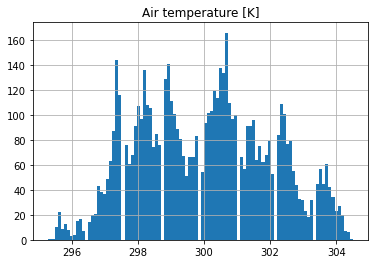

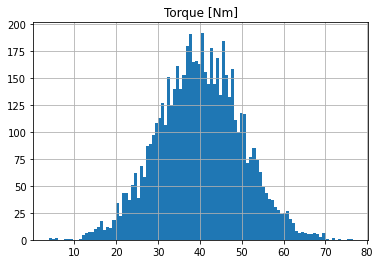

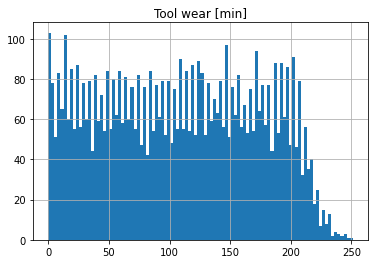

In [23]:
feature_dist(x)

Most distributions seem close to normal,student-T, or uniform in the case of Tool Wear
I will use Preprocessing to make sure the data fits a normal distribution.

In [24]:
scaler = preprocessing.StandardScaler().fit(x)

In [25]:
scaler

StandardScaler()

In [26]:
x_scaled = scaler.transform(x)

In [27]:
x_scaled

array([[-1.11500376,  0.12020176, -1.69202071],
       [-1.46724264, -0.37922386, -1.69202071],
       [ 1.09906915, -0.38921237, -1.69202071],
       ...,
       [ 1.45130802, -1.60781086,  2.11733063],
       [-0.5111657 ,  0.40986861,  2.14855482],
       [ 1.35066834,  0.62961588,  2.2266153 ]])

In [28]:
alpha = x_scaled
beta = y.values
print(x_scaled.shape, y.shape)

(6000, 3) (6000,)


In [29]:
[f_stat,f_p_value] = f_classif(x_scaled,y)

In [30]:
f_test_df = pd.DataFrame({'Feature':list(x),
'F statistic':f_stat,
'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
2,Tool wear [min],69.926351,7.579361e-17
1,Torque [Nm],3.034856,8.154504e-02
0,Air temperature [K],0.667840,4.138383e-01


Torque and Tool wear seem to be the useful statistics.

In [31]:
# in logistic regression, the fit is trying to reduce the error calculation.

In [32]:
import matplotlib.pyplot as plt
def graph_scat(dataF,x_col,y_col):
    """ this function will create graph a scatter plot in a quicker fashion"""
       
    plt.scatter(dataF[list(dataF)[x_col]],dataF[list(dataF)[y_col]])
    plt.xlabel(list(dataF)[x_col])
    
    if y_col == 7:
        
        plt.ylabel(list(dataF)[y_col]+' (power failure)') 
    elif y_col == 6:
        plt.ylabel(list(dataF)[y_col]+' (heat dissipation)') 
    elif y_col == 5:
        plt.ylabel(list(dataF)[y_col]+' (tool wear)') 
    elif y_col == 8:
        plt.ylabel(list(dataF)[y_col]+' (overstrain failure)')
    else:
        plt.ylabel(list(dataF)[y_col])
    plt.show()

def graph_plot(dataF,x_col,y_col):
    """ this function will create a plot in a quicker fashion"""
       
    plt.plot(dataF[list(dataF)[x_col]],dataF[list(dataF)[y_col]])
    plt.xlabel(list(dataF)[x_col])
    
    if y_col == 7:
        
        plt.ylabel(list(dataF)[y_col]+' (power failure)') 
    elif y_col == 6:
        plt.ylabel(list(dataF)[y_col]+' (heat dissipation)') 
    elif y_col == 5:
        plt.ylabel(list(dataF)[y_col]+' (tool wear)') 
    elif y_col == 8:
        plt.ylabel(list(dataF)[y_col]+' (overstrain failure)')
    else:
        plt.ylabel(list(dataF)[y_col]+ '(Random Failure)')
    plt.show()

HDF failures only occur at high values of torque

PWF failures occur ant low and high values of Torque

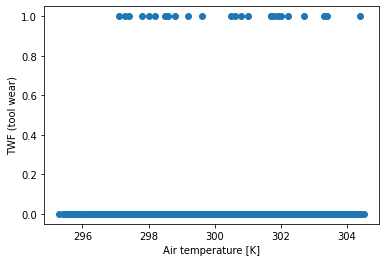

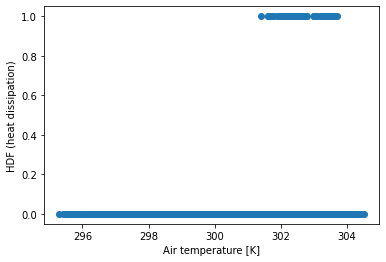

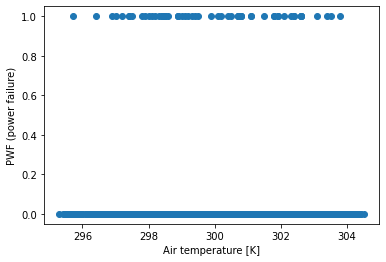

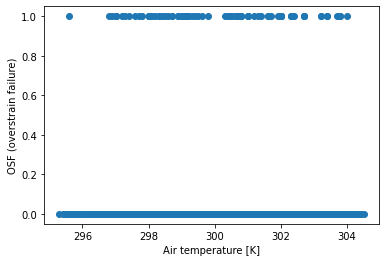

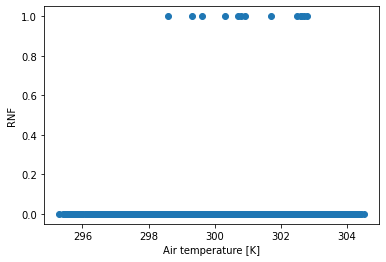

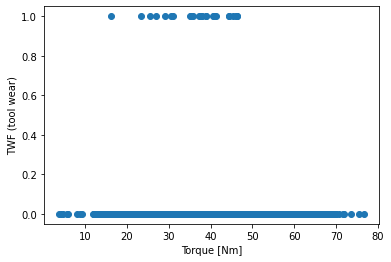

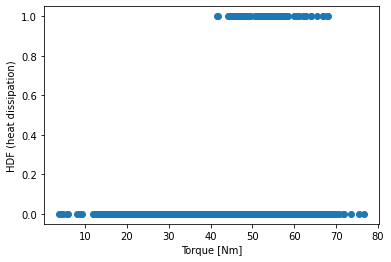

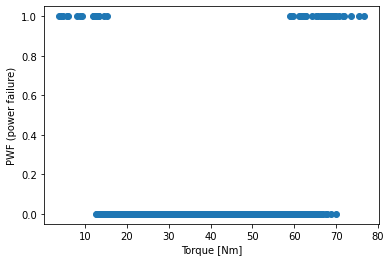

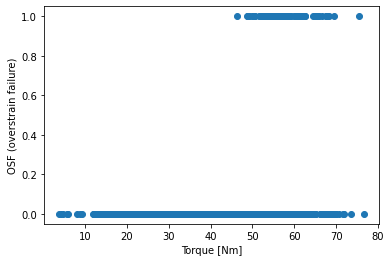

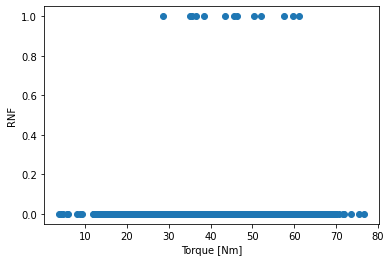

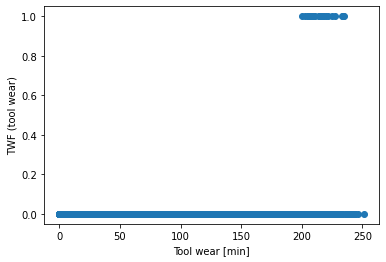

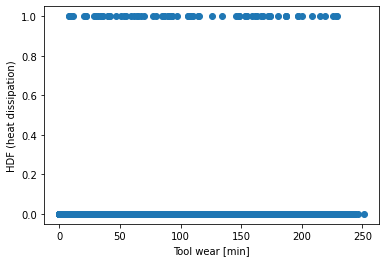

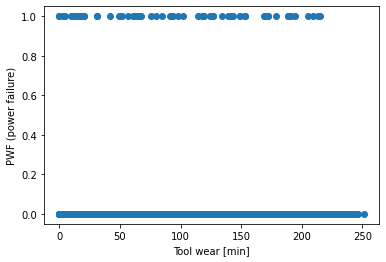

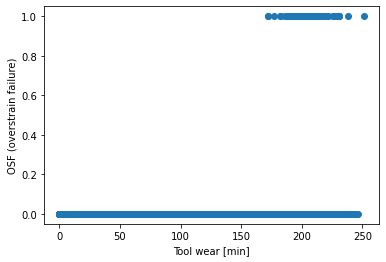

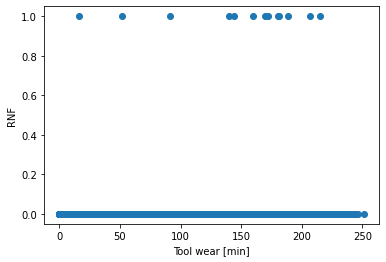

In [33]:
for x in range(1,4):
    for y in range(5,10):
        """ graphing the tables below at 1 time to compare"""
        graph_scat(df_L,x,y)
    

Above it shows how the failure modes occur in comparison to Torque

In [34]:
x_1=df_L[list(df2)[1:4]]

In [35]:
y_1 = df_L[list(df2)[5]]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(
         x_1, y_1, test_size=0.33, random_state=42)

In [37]:
clf_L = LogisticRegression(random_state = 42).fit(x_train,y_train)

In [38]:
clf_L.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
clf_L.predict_proba(x_1)

array([[9.99999996e-01, 3.90899771e-09],
       [9.99999994e-01, 5.81973390e-09],
       [9.99999996e-01, 4.42652880e-09],
       ...,
       [6.87750769e-01, 3.12249231e-01],
       [8.67914266e-01, 1.32085734e-01],
       [8.68037496e-01, 1.31962504e-01]])

In [40]:
clf_L.score(x_train,y_train)

0.9970149253731343

In [41]:
clf_L.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
clf_L.score(x_test,y_test)

0.9934343434343434

Now that we have a clasier for the machine of tyoe L. lets try Machine type M

In [43]:
df_M = df2[df2.Type==0].sort_values(by='Tool wear [min]')

In [44]:
y_0 = df_M[list(df_M)[5]]

In [45]:
y_0.value_counts()

0    2983
1      14
Name: TWF, dtype: int64

In [46]:
x_0=df_M[list(df2)[1:4]]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(
         x_0, y_0, test_size=0.25, random_state=42)

In [48]:
y_train.unique()

array([0, 1], dtype=int64)

In [49]:
clf_M = LogisticRegression(random_state = 42).fit(x_train,y_train)

In [50]:
clf_M.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
clf_M.predict_proba(x_train)

array([[9.99999972e-01, 2.80695482e-08],
       [1.00000000e+00, 1.18554190e-11],
       [1.00000000e+00, 4.24865529e-12],
       ...,
       [9.99999998e-01, 2.03971620e-09],
       [9.99999991e-01, 8.62455782e-09],
       [1.00000000e+00, 7.46838518e-11]])

In [52]:
clf_M.score(x_train,y_train)

0.9959946595460614

to run the classifier accross all failure modes for all machines quickly

In [53]:
def run_Log(x_values,y_values,percent_in_decimal,machine_type):
    """ runs logistic regression (x values againnst all failure modes) in one fast step"""
    if isinstance(y_values,pd.DataFrame) == True:
        score_lst=[]
        for col in y_values:
            x_train, x_test, y_train, y_test = train_test_split(
            x_values, y_values[col], test_size=percent_in_decimal, random_state=42)
            clf = LogisticRegression(random_state = 42).fit(x_train,y_train)
            clf.predict(x_train)
            clf.predict_proba(x_train)
            clf.score(x_train,y_train)
            clf.predict(x_test)
            clf.score(x_test, y_test)
            
            score_lst.append(clf.score(x_test, y_test))
            print('the efficiency to classify feature {} is {} for Machine type {}'.format(
                col,clf.score(x_test,y_test),machine_type))
        return score_lst
        
        
    else:
        x_train, x_test, y_train, y_test = train_test_split(
        x_values, y_values, test_size=percent_in_decimal, random_state=42)
        clf = LogisticRegression(random_state = 42).fit(x_train,y_train)
        clf.predict(x_train)
        clf.predict_proba(x_train)
        clf.score(x_train,y_train)
        clf.predict(x_test)
        clf.score(x_test, y_test)
        print('the efficency is {}'.format(clf.score(x_test,y_test)))            
        return  clf.score(x_test,y_test)

In [60]:
y_0 = df_M[list(df_M)[5:10]]
x_0 = df_M[list(df_M)[1:4]]

In [61]:
percent = .22
print(run_Log(x_0,y_0,percent,'M'))

the efficiency to classify feature TWF is 0.9954545454545455 for Machine type M
the efficiency to classify feature HDF is 0.9863636363636363 for Machine type M
the efficiency to classify feature PWF is 0.9924242424242424 for Machine type M
the efficiency to classify feature OSF is 1.0 for Machine type M
the efficiency to classify feature RNF is 0.9984848484848485 for Machine type M
[0.9954545454545455, 0.9863636363636363, 0.9924242424242424, 1.0, 0.9984848484848485]


In [62]:
x_1=df_L[list(df2)[1:4]]

In [63]:
y_1 = df_L[list(df2)[5:10]]

In [64]:
percent = .22
print(run_Log(x_1,y_1,percent,'L'))

the efficiency to classify feature TWF is 0.9916666666666667 for Machine type L
the efficiency to classify feature HDF is 0.9840909090909091 for Machine type L
the efficiency to classify feature PWF is 0.9886363636363636 for Machine type L
the efficiency to classify feature OSF is 0.9992424242424243 for Machine type L
the efficiency to classify feature RNF is 0.9984848484848485 for Machine type L
[0.9916666666666667, 0.9840909090909091, 0.9886363636363636, 0.9992424242424243, 0.9984848484848485]


In [55]:
df_H = df2[df2.Type==2].sort_values(by='Tool wear [min]')

In [59]:
x_2=df_H[list(df2)[1:4]]

In [60]:
y_2 = df_H[list(df2)[5:10]]

In [61]:
percent = .22
print(run_Log(x_2,y_2,percent,'H'))

the efficiency to classify feature TWF is 0.9909502262443439 for Machine type H
the efficiency to classify feature HDF is 0.995475113122172 for Machine type H
the efficiency to classify feature PWF is 0.9909502262443439 for Machine type H
the efficiency to classify feature OSF is 0.995475113122172 for Machine type H
the efficiency to classify feature RNF is 1.0 for Machine type H
[0.9909502262443439, 0.995475113122172, 0.9909502262443439, 0.995475113122172, 1.0]
